In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
dataset = pd.read_csv('../input/heart-disease-uci/heart.csv')

In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Checking for null values in the dataset
dataset.isnull().values.any()

False

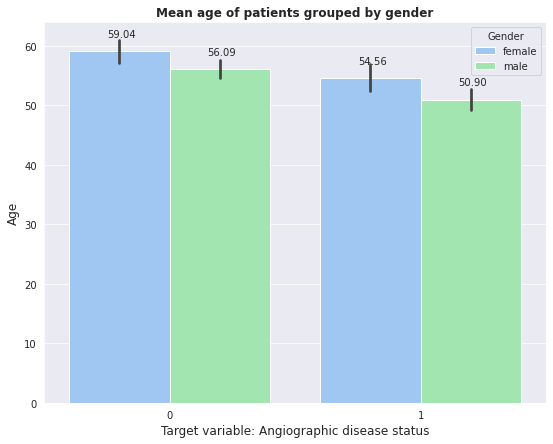

In [6]:
# Visualising the dataset
plt.figure(figsize=(9,7))
plt.style.use('seaborn-pastel')
labels=['female','male']
sns.set_style("darkgrid")
ax=sns.barplot(x='target',y='age',data=dataset,hue='sex')
h, l = ax.get_legend_handles_labels()
ax.legend(h,labels,title="Gender",loc='upper right')
ax.set_ylabel("Age",fontdict={'fontsize' : 12})
ax.set_xlabel("Target variable: Angiographic disease status",fontdict={'fontsize' : 12})
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}'.format(height), (x+ 0.15, y + height + 2.4))
plt.title('Mean age of patients grouped by gender',fontweight="bold")
plt.show()

In [7]:
# Defining the features and the outcome variable
x= dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [8]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,[0,3,4,7,9,11]] = sc.fit_transform(x_train[:,[0,3,4,7,9,11]])
x_test[:,[0,3,4,7,9,11]] = sc.transform(x_test[:,[0,3,4,7,9,11]])

In [10]:
print(x_train[0])

[-1.32773282  0.          2.         -0.57412513 -0.63267424  0.
  1.          0.65626162  0.         -0.72460883  1.         -0.70710678
  2.        ]


In [11]:
print(x_test[0])

[ 1.69716475  1.          0.          0.77251645 -1.36354075  0.
  1.         -1.07375268  1.          1.2900049   0.         -0.70710678
  3.        ]


In [12]:
## Applying the Logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [13]:
## Predicting test results
y_pred = classifier.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


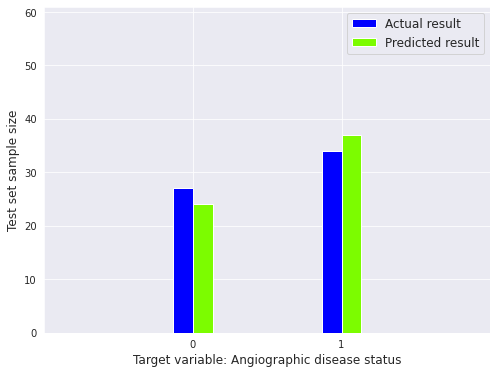

In [14]:
# Visualising the test results vs predicted results
bins = np.linspace(-1,2,10)
plt.figure(figsize=(8,6))
ax =plt.hist([y_test,y_pred],bins=bins,color=['blue','lawngreen'],label=['Actual result','Predicted result'],align='left')
plt.xlabel('Target variable: Angiographic disease status',fontdict={'fontsize' : 12})
plt.ylabel('Test set sample size',fontdict={'fontsize' : 12})
plt.xlim(-1,2)
plt.xticks([0,1])
plt.ylim(0,len(y_test))
plt.legend(prop={'size': 12})
plt.show()

In [15]:
## Calculating the accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
ac_LogReg = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [16]:
## Printing the accuracy score
print(ac_LogReg)

0.8524590163934426


In [17]:
## Printing the confusion matrix
print(cm)

[[21  6]
 [ 3 31]]


****

In [18]:
## Applying the non-linear SVC model on the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)

SVC(random_state=0)

In [19]:
## Predicting test results
y_pred = classifier.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


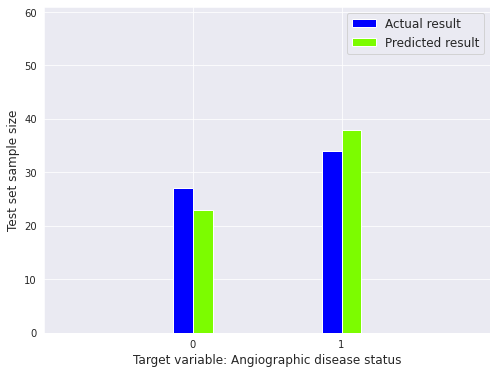

In [20]:
# Visualising the test results vs predicted results
bins = np.linspace(-1,2,10)
plt.figure(figsize=(8,6))
ax =plt.hist([y_test,y_pred],bins=bins,color=['blue','lawngreen'],label=['Actual result','Predicted result'],align='left')
plt.xlabel('Target variable: Angiographic disease status',fontdict={'fontsize' : 12})
plt.ylabel('Test set sample size',fontdict={'fontsize' : 12})
plt.xlim(-1,2)
plt.xticks([0,1])
plt.ylim(0,len(y_test))
plt.legend(prop={'size': 12})
plt.show()

In [21]:
## Calculating the accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
ac_SVC = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [22]:
## Printing the accuracy score
print(ac_SVC)

0.8688524590163934


In [23]:
## Printing the confusion matrix
print(cm)

[[21  6]
 [ 2 32]]


---

In [24]:
## Applying the Linear SVC model on the training set
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [25]:
## Predicting test results
y_pred = classifier.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


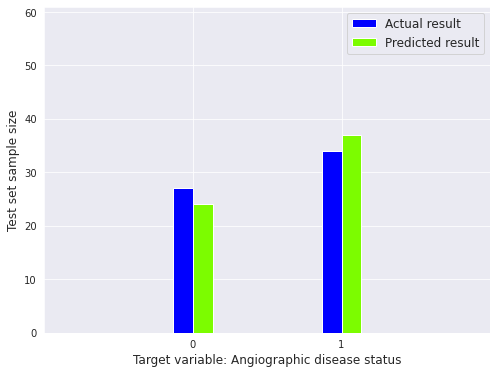

In [26]:
# Visualising the test results vs predicted results
bins = np.linspace(-1,2,10)
plt.figure(figsize=(8,6))
ax =plt.hist([y_test,y_pred],bins=bins,color=['blue','lawngreen'],label=['Actual result','Predicted result'],align='left')
plt.xlabel('Target variable: Angiographic disease status',fontdict={'fontsize' : 12})
plt.ylabel('Test set sample size',fontdict={'fontsize' : 12})
plt.xlim(-1,2)
plt.xticks([0,1])
plt.ylim(0,len(y_test))
plt.legend(prop={'size': 12})
plt.show()

In [27]:
## Calculating the accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
ac_LinearSVC = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [28]:
## Printing accuracy score
print(ac_LinearSVC)

0.819672131147541


In [29]:
#Printing confusion matrix
print(cm)

[[20  7]
 [ 4 30]]


---

In [30]:
## Applying the K-NN classification model on the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [31]:
## Predicting test results
y_pred = classifier.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


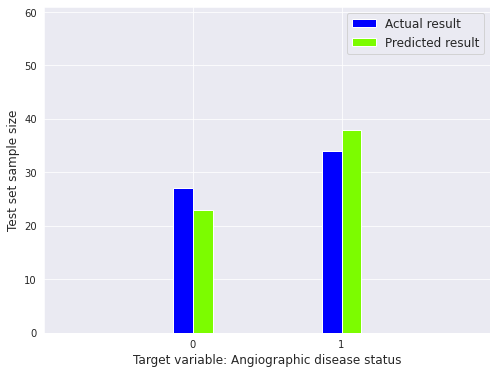

In [32]:
# Visualising the test results vs predicted results
bins = np.linspace(-1,2,10)
plt.figure(figsize=(8,6))
ax =plt.hist([y_test,y_pred],bins=bins,color=['blue','lawngreen'],label=['Actual result','Predicted result'],align='left')
plt.xlabel('Target variable: Angiographic disease status',fontdict={'fontsize' : 12})
plt.ylabel('Test set sample size',fontdict={'fontsize' : 12})
plt.xlim(-1,2)
plt.xticks([0,1])
plt.ylim(0,len(y_test))
plt.legend(prop={'size': 12})
plt.show()

In [33]:
## Calculating the accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
ac_KNN = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [34]:
# Printing accuarcy score
print(ac_KNN)

0.8360655737704918


In [35]:
# Printing confusion matrix
print(cm)

[[20  7]
 [ 3 31]]


---

In [36]:
## Applying the Naive Bayes classification model on the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [37]:
## Predicting test results
y_pred = classifier.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


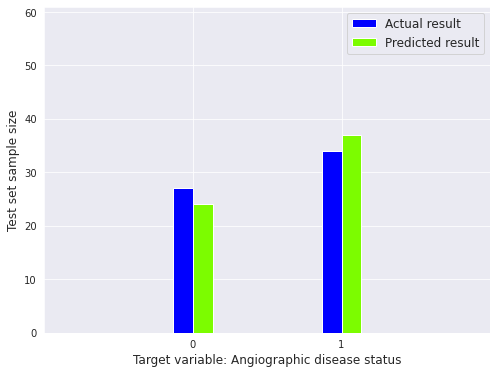

In [38]:
# Visualising the test results vs predicted results
bins = np.linspace(-1,2,10)
plt.figure(figsize=(8,6))
ax =plt.hist([y_test,y_pred],bins=bins,color=['blue','lawngreen'],label=['Actual result','Predicted result'],align='left')
plt.xlabel('Target variable: Angiographic disease status',fontdict={'fontsize' : 12})
plt.ylabel('Test set sample size',fontdict={'fontsize' : 12})
plt.xlim(-1,2)
plt.xticks([0,1])
plt.ylim(0,len(y_test))
plt.legend(prop={'size': 12})
plt.show()

In [39]:
## Calculating the accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
ac_NBayes = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [40]:
# Printing accuracy score
print(ac_NBayes)

0.8524590163934426


In [41]:
# Printing confusion matrix
print(cm)

[[21  6]
 [ 3 31]]


---

In [42]:
## Applying the Decision Tree Classification model on the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [43]:
## Predicting test results
y_pred = classifier.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


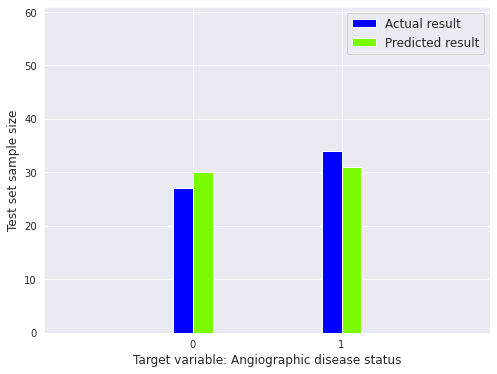

In [44]:
# Visualising the test results vs predicted results
bins = np.linspace(-1,2,10)
plt.figure(figsize=(8,6))
ax =plt.hist([y_test,y_pred],bins=bins,color=['blue','lawngreen'],label=['Actual result','Predicted result'],align='left')
plt.xlabel('Target variable: Angiographic disease status',fontdict={'fontsize' : 12})
plt.ylabel('Test set sample size',fontdict={'fontsize' : 12})
plt.xlim(-1,2)
plt.xticks([0,1])
plt.ylim(0,len(y_test))
plt.legend(prop={'size': 12})
plt.show()

In [45]:
## Calculating the accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
ac_DecisionTree = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [46]:
## Printing accuracy score
print(ac_DecisionTree)

0.7868852459016393


In [47]:
## Printing confusion matrix
print(cm)

[[22  5]
 [ 8 26]]


---

In [48]:
## Applying the Random Forest Classification model on the training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [49]:
## Predicting test results
y_pred = classifier.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


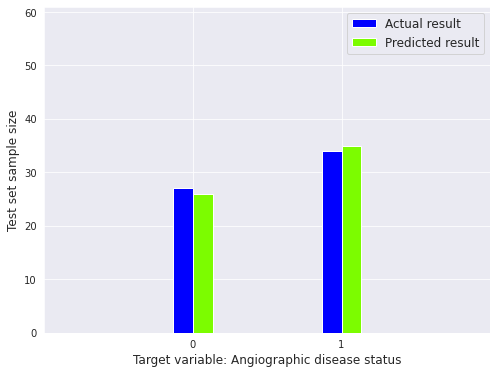

In [50]:
# Visualising the test results vs predicted results
bins = np.linspace(-1,2,10)
plt.figure(figsize=(8,6))
arr =plt.hist(x=[y_test,y_pred],bins=bins,color=['blue','lawngreen'],label=['Actual result','Predicted result'],align='left')
plt.xlabel('Target variable: Angiographic disease status',fontdict={'fontsize' : 12})
plt.ylabel('Test set sample size',fontdict={'fontsize' : 12})
plt.xlim(-1,2)
plt.xticks([0,1])
plt.ylim(0,len(y_test))
plt.legend(prop={'size': 12})
plt.show()

In [51]:
## Calculating the accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
ac_randomForest = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [52]:
## Printing accuarcy score
print(ac_randomForest)

0.8524590163934426


In [53]:
## Printing confusion matrix
print(cm)

[[22  5]
 [ 4 30]]


---

In [54]:
## Applying the XGBoost Classification model on the training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
## Predicting test results
y_pred = classifier.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


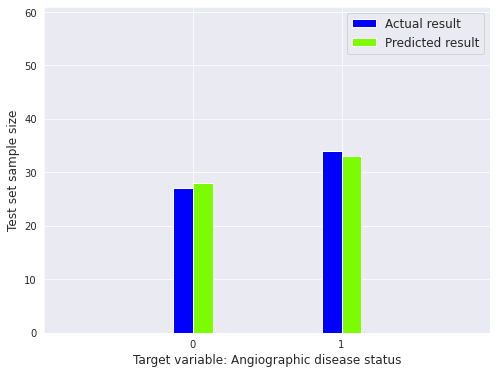

In [56]:
# Visualising the test results vs predicted results
bins = np.linspace(-1,2,10)
plt.figure(figsize=(8,6))
arr =plt.hist(x=[y_test,y_pred],bins=bins,color=['blue','lawngreen'],label=['Actual result','Predicted result'],align='left')
plt.xlabel('Target variable: Angiographic disease status',fontdict={'fontsize' : 12})
plt.ylabel('Test set sample size',fontdict={'fontsize' : 12})
plt.xlim(-1,2)
plt.xticks([0,1])
plt.ylim(0,len(y_test))
plt.legend(prop={'size': 12})
plt.show()

In [57]:
## Calculating the accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
ac_xgb = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [58]:
## Printing accuarcy score
print(ac_xgb)

0.7868852459016393


In [59]:
## Printing confusion matrix
print(cm)

[[21  6]
 [ 7 27]]


---

In [60]:
#Comparing results of the models based on accuracy score
modelList = [ac_LogReg,ac_SVC,ac_LinearSVC,ac_KNN,ac_NBayes,ac_DecisionTree,ac_randomForest,ac_xgb]

In [61]:
for i in range(0,len(modelList)):
    modelList[i] = modelList[i]*100
print(modelList)

[85.24590163934425, 86.88524590163934, 81.9672131147541, 83.60655737704919, 85.24590163934425, 78.68852459016394, 85.24590163934425, 78.68852459016394]


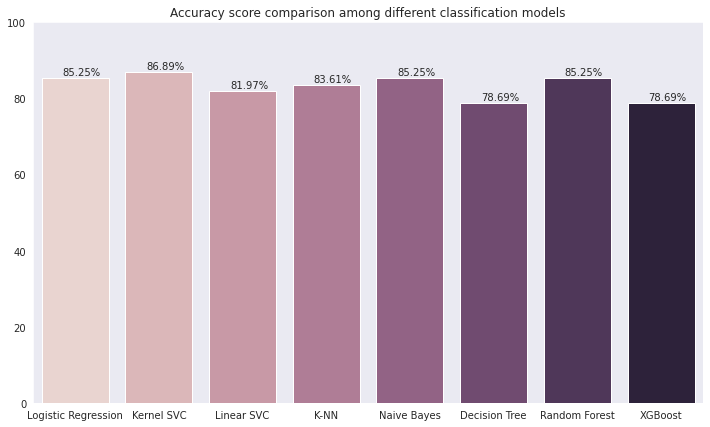

In [62]:
labelList = ['Logistic Regression','Kernel SVC','Linear SVC','K-NN','Naive Bayes','Decision Tree','Random Forest',
            'XGBoost']
plt.figure(figsize=(12,7))
sns.set_style('dark')
ax = sns.barplot(x=labelList,y=modelList,palette=sns.cubehelix_palette(8))
plt.ylim(0,100)
plt.title('Accuracy score comparison among different classification models')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}%'.format(height), (x+0.25, y + height + 0.8))
plt.show()